# Velocidad del viento

## Librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción

 El pronóstico de la velocidad del viento es de vital importancia debido a sus implicaciones en áreas clave como la seguridad en la aviación y la navegación, la generación de energía eólica, la agricultura, la construcción, la meteorología, y actividades recreativas y deportivas. Nos centramos en el análisis exploratorio de datos (EDA) basado en un conjunto de mediciones de velocidad del viento recolectadas cada 24 horas. 

El objetivo principal del análisis es evaluar y comprender los patrones subyacentes en las mediciones para predecir la velocidad del viento durante las próximas 24 horas, con el propósito de determinar cuánta energía eólica podría generarse en este período. Esta información es crucial para el desarrollo de estrategias comerciales, como la venta de energía eólica a empresas que producen hidrógeno verde, lo que permitiría optimizar la generación y el uso de recursos renovables.

In [9]:
windata = pd.read_csv("C:\\Users\\KELLY\\Desktop\\Segundo parcial ML\\data_treino_dv_df_2000_2010.csv")

**Variables**


-HORA (UTC): Hora

-VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr)): Dirección del viento horaria

-VENTO, VELOCIDADE HORARIA (m/s): Velocidad horario del viento (m/s)

-UMIDADE REL. MAX. NA HORA ANT. (AUT) (%): Humedad rel. máx. hora anterior (AUT) (%)

-UMIDADE REL. MIN. NA HORA ANT. (AUT) (%): Humedad rel. mín. hora anterior (AUT) (%)

-TEMPERATURAMï¿½XIMANAHORAANT.(AUT)(ï¿½C):Temperaturamáx.horaanterior(AUT)
 (℃)

-TEMPERATURAMï¿½NIMA NA HORAANT.(AUT) (ï¿½C):Temperaturamín. hora anterior (AUT)
 ( ℃)

-UMIDADE RELATIVA DO AR, HORARIA (%): Humedad relativa horaria (%)

-PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB):Presión atmosférica a nivel
 de estación, horaria (mB)

-PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm): Precipitación total por hora (mm)

-VENTO, RAJADA MAXIMA (m/s): Máxima ráfaga de viento (m/s)

-PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB): Presión atmosférica máx. hora
 anterior (AUT) (mB)
 
-PRESSï¿½O ATMOSFERICA MIN.NA HORA ANT. (AUT) (mB): Presión atmosférica mín. hora an
terior (AUT) (mB)

Se llevará a cabo un proceso de renombrado de las variables, con el fin de hacerlas más comprensibles y manejables, ya que la mayoria de las variables presentan nombres excesivamente largos.

In [5]:
Data = windata.rename(columns={
    'HORA (UTC)': 'Hora',
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'direccion_v',
    'VENTO, VELOCIDADE HORARIA (m/s)' : 'Velocidad_v',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Humedad_max',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)' : 'Humedad_min',
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperaturamáx',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperaturamín',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Humedad_relativa',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Presión_atmosférica',
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'Precipitación', 
    'VENTO, RAJADA MAXIMA (m/s)' : 'Máxima_ráfaga',
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)' : 'Presión_atmosférica_máx',
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Presión_atmosférica_mín'
})

display(Data.head(6))

Data.to_csv('windata_2.csv', index=False)

,Hora,direccion_v,Velocidad_v,Humedad_max,Humedad_min,Temperaturamáx,Temperaturamín,Humedad_relativa,Presión_atmosférica,Precipitación,Máxima_ráfaga,Presión_atmosférica_máx,Presión_atmosférica_mín
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
5,17:00,0.034899,1.8,48.0,41.0,27.4,25.9,45.0,885.9,0.0,4.3,886.5,885.9


In [25]:
Data = pd.read_csv("C:\\Users\\KELLY\\Desktop\\Segundo parcial ML\\windata_2.csv")

En el siguiente paso del análisis, procederemos a clasificar las variables según su tipo, identificando si son cuantitativas o cualitativas. 

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hora                     87693 non-null  object 
 1   direccion_v              87693 non-null  float64
 2   Velocidad_v              87693 non-null  float64
 3   Humedad_max              87693 non-null  float64
 4   Humedad_min              87693 non-null  float64
 5   Temperaturamáx           87693 non-null  float64
 6   Temperaturamín           87693 non-null  float64
 7   Humedad_relativa         87693 non-null  float64
 8   Presión_atmosférica      87693 non-null  float64
 9   Precipitación            87693 non-null  float64
 10  Máxima_ráfaga            87693 non-null  float64
 11  Presión_atmosférica_máx  87693 non-null  float64
 12  Presión_atmosférica_mín  87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


In [12]:
Data.shape

(87693, 13)

Este dataset cuenta con 87,693 observaciones y 13 columnas.Se identifican dos tipos de datos: la variable "Hora" es de tipo categórica, mientras que las restantes 12 variables son de tipo cuantitativo.

 ## Variables Categoricas

Se realizará un resumen estadístico de la variable categorica (Hora).

In [22]:
Data.select_dtypes(include=['object']).describe()

,Hora
count,87693
unique,24
top,01:00
freq,3683


Estos resultados nos indican que hay 87693 valores no nulos, lo que significa que no hay datos faltantes; tambien, que existen 24 valores únicos significa el ciclo de 24 horas del dia.
El valor frecuente (top) es la hora que mas se repite ya que aparece 3683 veces en el dataset.

C:\Users\KELLY\AppData\Local\Temp\ipykernel_9512\3604080542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= Data, x='Hora', palette='cubehelix')


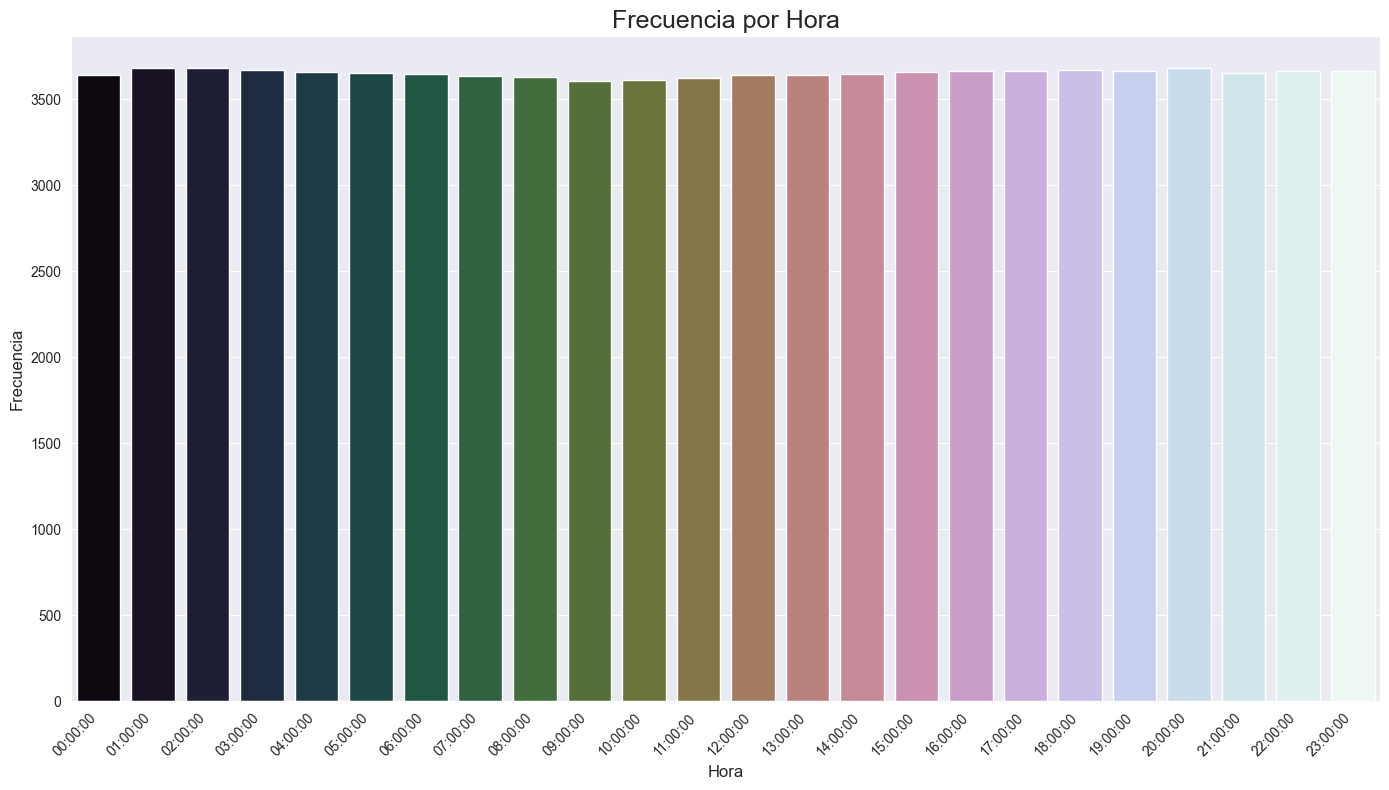

In [69]:
Data.sort_values('Hora', inplace=True)
plt.figure(figsize=(14, 8))
sns.countplot(data= Data, x='Hora', palette='cubehelix')
plt.xticks(rotation=45, ha='right')

plt.title('Frecuencia por Hora', fontsize=18)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout() 
plt.show()

Ahora con este diagrama de barras para la variable "Hora", se observa que la mayoría de las horas presenta frecuencias similares, solo con ligeras variaciones. Cada barra del gráfico muestra que las mediciones por hora son bastante consistentes, todas superando las 3,500 observaciones. Esto nos dice que los datos registrados están bien distribuidos a lo largo del día.

## Variables Númericas

A continuación, el resumen estadístico de las variables númericas que incluyen mediciones relacionadas con la dirección y velocidad del viento, niveles de humedad, temperatura, presión atmosférica, y precipitación.

In [8]:
Data.select_dtypes(include=['float64']).describe()

,direccion_v,Velocidad_v,Humedad_max,Humedad_min,Temperaturamáx,Temperaturamín,Humedad_relativa,Presión_atmosférica,Precipitación,Máxima_ráfaga,Presión_atmosférica_máx,Presión_atmosférica_mín
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


Con esto se obtuvo la media, desviación estándar, mínimo, máximo y cuartiles.

Por primera vista varias de las variables sugieren posibles patrones de normalidad o al menos una distribución bastante consistente en ciertas variables, como temperatura maxima y minima (Temperaturamáx y Temperaturamín) con medias de 21.9°C y 20.7°C, respectivamente, y los valores están bastante concentrados alrededor de la media, lo que podría sugerir normalidad. Otras variables como Humedad máxima, mínima y relativa (Humedad_max, Humedad_min y Humedad_relativa) con medias alrededor del 66-69%, y valores que se dispersan de manera uniforme entre los percentiles, sugiriendo que podrían seguir una distribución cercana a la normalidad.

De manera contraria esta la variable Máxima ráfaga muestra un comportamiento más extremo, con maximo de 24.3 m/s y el comportamiento de los percentiles con números más pequeños, lo que podría indicar una distribución no normal con mayor dispersión y posibles picos inusuales. 

### Variable objetivo

Miramos más de cerca nuestra variable respuesta u objetivo. 

In [29]:
Data['Velocidad_v'].describe()

count    87693.000000
mean         2.466192
std          1.313968
min          0.000000
25%          1.500000
50%          2.400000
75%          3.400000
max         10.000000
Name: Velocidad_v, dtype: float64

 La velocidad del viento ("Velocidad_v") tiene una distribución concentrada alrededor de valores bajos, con algunas mediciones (0 m/s) y su medición más fuerte (hasta 10 m/s). La media de (2.47 m/s) es ligeramente superior a la mediana de (2.4 m/s), lo que indica una posible asimetría positiva (sesgo a la derecha). La mayoría de los datos está dentro de un rango de velocidad moderada, lo cual sugiere estabilidad, aunque hay variaciones menores. 

# Datos Faltantes

In [72]:
print("\nValores nulos por columna:")
Data.isnull().sum()



Valores nulos por columna:


Hora                       0
direccion_v                0
Velocidad_v                0
Humedad_max                0
Humedad_min                0
Temperaturamáx             0
Temperaturamín             0
Humedad_relativa           0
Presión_atmosférica        0
Precipitación              0
Máxima_ráfaga              0
Presión_atmosférica_máx    0
Presión_atmosférica_mín    0
dtype: int64

El conjunto de datos no presenta valores faltantes.

# Análisis visual de simetría, datos atípicos y dispersión

***Para este análisis vamos a separlarlos por grupos  de variables para poder observar mejor

## Humedad

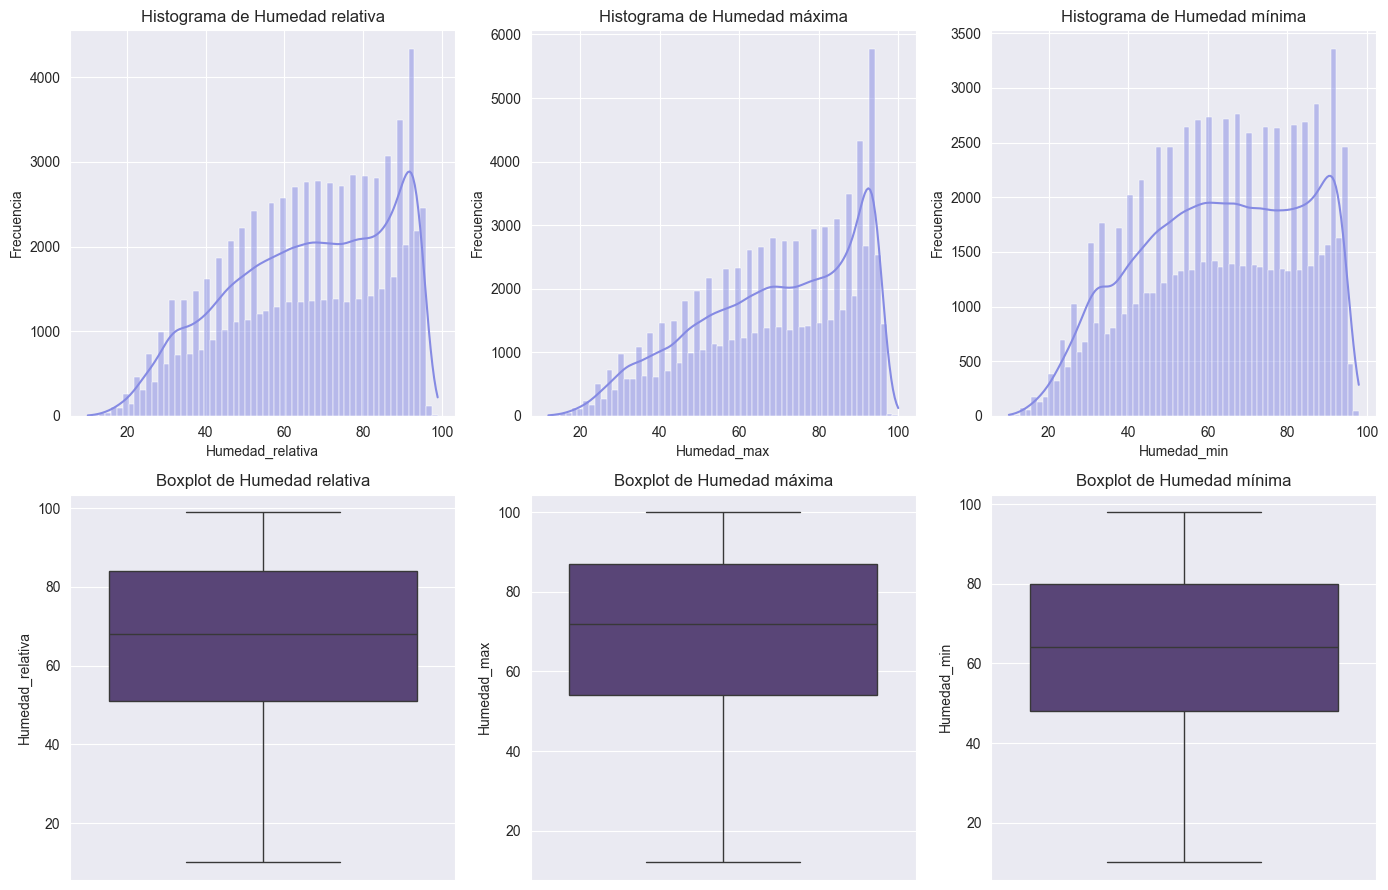

In [13]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 3, figsize=(14, 9))

sns.histplot(Data['Humedad_relativa'], kde=True, color='#858ae3', ax=axs[0,0])
axs[0,0].set_title('Histograma de Humedad relativa')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(Data['Humedad_max'], kde=True, color='#858ae3', ax=axs[0,1])
axs[0,1].set_title('Histograma de Humedad máxima')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(Data['Humedad_min'], kde=True, color='#858ae3', ax=axs[0,2])
axs[0,2].set_title('Histograma de Humedad mínima')
axs[0,2].set_ylabel('Frecuencia')

sns.boxplot(y=Data['Humedad_relativa'], color='#573d7f', ax=axs[1,0])
axs[1,0].set_title('Boxplot de Humedad relativa')

sns.boxplot(y=Data['Humedad_max'], color='#573d7f', ax=axs[1,1])
axs[1,1].set_title('Boxplot de Humedad máxima')

sns.boxplot(y=Data['Humedad_min'], color='#573d7f', ax=axs[1,2])
axs[1,2].set_title('Boxplot de Humedad mínima')


plt.tight_layout()
plt.show()

### **Humedad Relativa:**
La **humedad relativa** presenta un sesgo leve hacia la izquierda, lo que indica una mayor concentración de datos en el extremo superior y en histograma con un incremento gradual de la frecuencia. En cuanto a los **datos atípicos**, según el boxplot no es notable datos atipicos. Respecto a la **dispersión**, su desviación estándar es de 19.99, y el rango es amplio, con una diferencia de 89 entre el valor máximo y mínimo, lo que indica una variabilidad considerable en la humedad relativa.

### **Humedad Máxima:**
La **humedad máxima** también presenta un sesgo leve hacia la izquierda, los datos se concentran en el extremo superior  lo que sugiere que la distribución está inclinada hacia valores más altos. En el análisis de **datos atípicos** no se observan valores fuera de los límites esperados (12% a 100%). En cuanto a la **dispersión** muestra una alta variabilidad en los valores máximos de humedad.

### **Humedad Mínima:**
La **humedad mínima** sigue el mismo patrón. El análisis de **datos atípicos** se encuentran dentro de los límites (10% a 98%). Finalmente, la **dispersión** también es alta, con una desviación estándar de 20.17 y un rango de 88, lo que refleja variaciones considerables en los valores mínimos de humedad.


## Temperatura

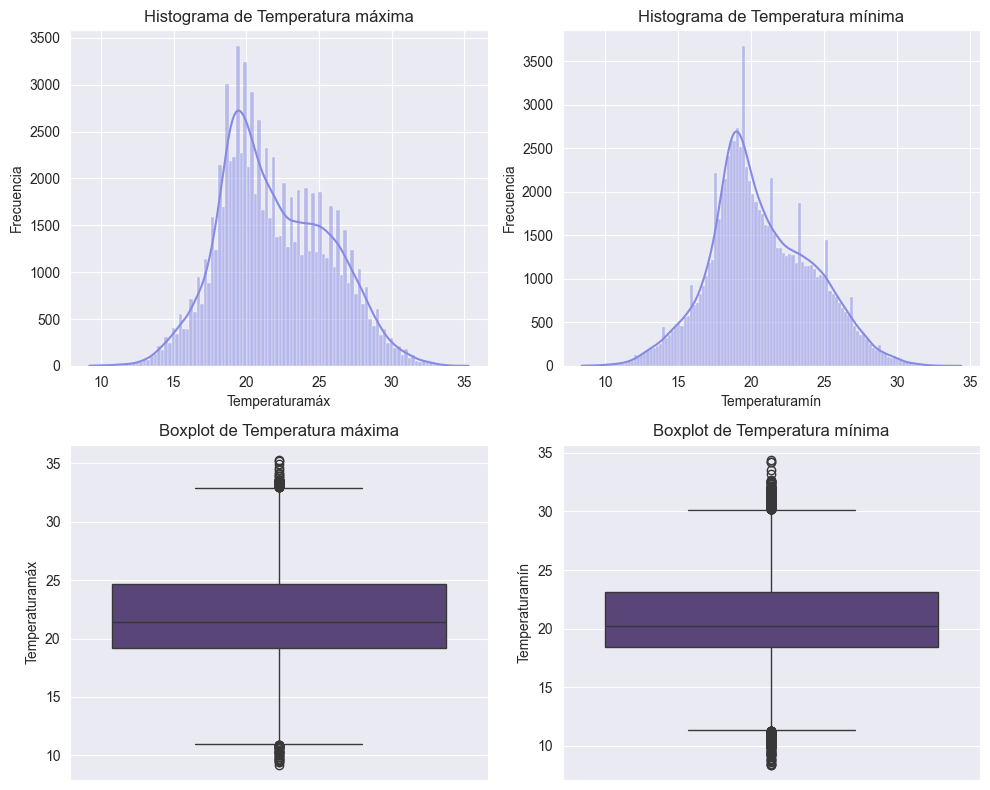

In [14]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(Data['Temperaturamáx'], kde=True, color='#858ae3', ax=axs[0,0])
axs[0,0].set_title('Histograma de Temperatura máxima')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(Data['Temperaturamín'], kde=True, color='#858ae3', ax=axs[0,1])
axs[0,1].set_title('Histograma de Temperatura mínima')
axs[0,1].set_ylabel('Frecuencia')

sns.boxplot(y=Data['Temperaturamáx'], color='#573d7f', ax=axs[1,0])
axs[1,0].set_title('Boxplot de Temperatura máxima')


sns.boxplot(y=Data['Temperaturamín'], color='#573d7f', ax=axs[1,1])
axs[1,1].set_title('Boxplot de Temperatura mínima')


plt.tight_layout()
plt.show()


### **Temperatura Máxima:**
La **temperatura Máxima** en el histograma presenta lo que indica un sesgo leve hacia la derecha, con un primer pico en temperaturas inferiores a 20 y una segunda curva descendente a medida que la temperatura aumenta. Los **datos atípicos** tanto por arriba como por abajo sugiere que existen valores extremos que podrían influir en la media, lo que indica que hay días con temperaturas muy altas y otros con temperaturas muy bajas que pueden considerarse atípicos. Indicando una **dispersión** relativamente moderada con una concentración notable de datos en este intervalo.

### **Temperatura Mínima:**
La **temperatura Mínima** también muestra un sesgo positivo leve, esto sugiere que algunos días registran temperaturas mínimas más altas. En el análisis de **datos atípicos** sugiere que existen valores extremos que pueden considerarse atípicos. En cuanto a la **dispersión** la idea de que las temperaturas mínimas también muestran una variabilidad considerable. Al igual que en el caso de las temperaturas máximas resaltan que, aunque la mayoría de las temperaturas mínimas se agrupan en un rango moderado, los valores extremos pueden influir en el análisis de las condiciones climáticas nocturnas.

## Presión

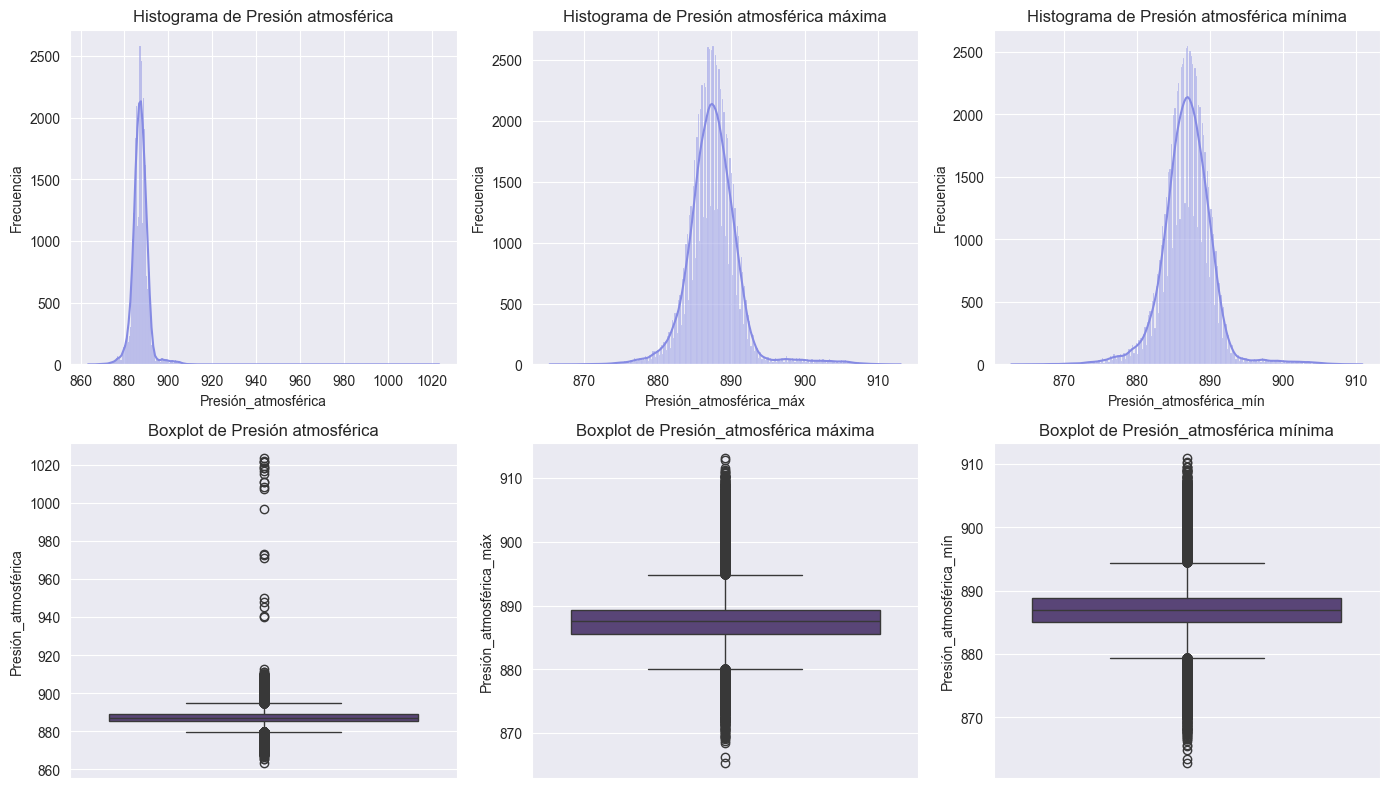

In [15]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

sns.histplot(Data['Presión_atmosférica'], kde=True, color='#858ae3', ax=axs[0,0])
axs[0,0].set_title('Histograma de Presión atmosférica')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(Data['Presión_atmosférica_máx'], kde=True, color='#858ae3', ax=axs[0,1])
axs[0,1].set_title('Histograma de Presión atmosférica máxima')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(Data['Presión_atmosférica_mín'], kde=True, color='#858ae3', ax=axs[0,2])
axs[0,2].set_title('Histograma de Presión atmosférica mínima')
axs[0,2].set_ylabel('Frecuencia')

sns.boxplot(y=Data['Presión_atmosférica'], color='#573d7f', ax=axs[1,0])
axs[1,0].set_title('Boxplot de Presión atmosférica')

sns.boxplot(y=Data['Presión_atmosférica_máx'], color='#573d7f', ax=axs[1,1])
axs[1,1].set_title('Boxplot de Presión_atmosférica máxima')

sns.boxplot(y=Data['Presión_atmosférica_mín'], color='#573d7f', ax=axs[1,2])
axs[1,2].set_title('Boxplot de Presión_atmosférica mínima')


plt.tight_layout()
plt.show()

### **Presión Atmosférica:**
La **Presión Atmosférica** indica una distribución bastante simétrica, pero con un sesgo positivo indicando que hay una mayor concentración de datos en valores bajos. En cuanto a los **datos atípicos** Se detectaron datos atípicos extremos, que están muy alejados de estos límites, sugiriendo condiciones atmosféricas inusuales en esos casos. La **dispersión** desviación estándar es relativamente baja, lo que sugiere que muchos valores se agrupan alrededor de la media, el amplio rango indica que hay algunos valores extremadamente altos y bajos que afectan la variabilidad genera

### **Presión Atmosférica Máxima:**
La **Presión Atmosférica Máxima** sugiere una distribución simétrica y sin sesgo significativo. En el análisis de **datos atípicos**  se detectaron datos atípicos inferiores y superiores al rango, en cuanto a la **dispersión** la mayoría de los datos están más concentrados alrededor de la media.

### **Presión Atmosférica Mínima:**
La **Presión Atmosférica Mínima** indica que la distribución es también simétrica y carece de sesgo significativo. El análisis de **datos atípicos** se detectaron datos atípicos inferiores y superiores al rango, la **dispersión** La baja desviación estándar indica que la mayoría de los valores están agrupados cerca de la media, aunque el rango muestra que hay algunos valores extremos que contribuyen a la variabilidad.

## Precipitación, ráfaga y direccíon 

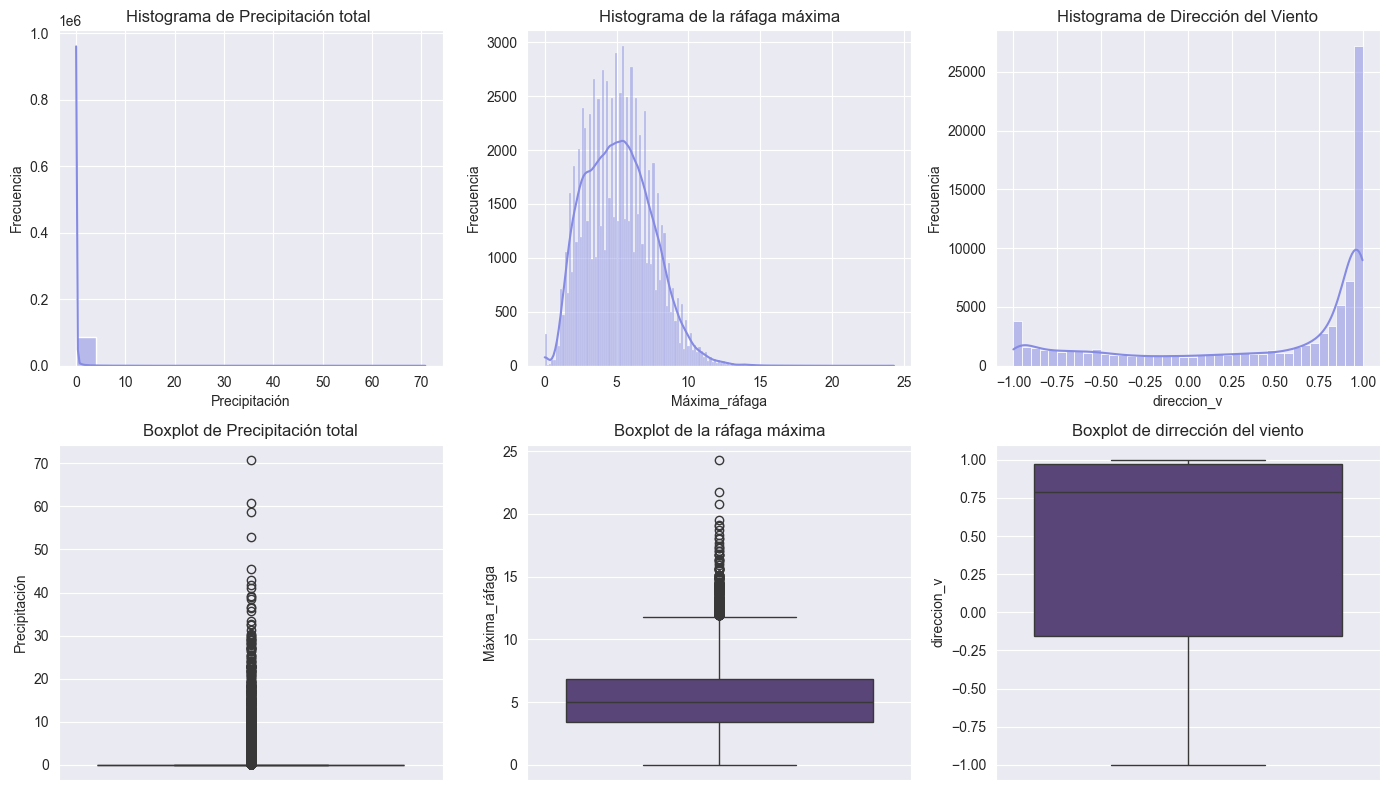

In [16]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

sns.histplot(Data['Precipitación'], kde=True, color='#858ae3', ax=axs[0,0])
axs[0,0].set_title('Histograma de Precipitación total ')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(Data['Máxima_ráfaga'], kde=True, color='#858ae3', ax=axs[0,1])
axs[0,1].set_title('Histograma de la ráfaga máxima')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(Data['direccion_v'], kde=True, color='#858ae3', ax=axs[0,2])
axs[0,2].set_title('Histograma de Dirección del Viento')
axs[0,2].set_ylabel('Frecuencia')

sns.boxplot(y=Data['Precipitación'], color='#573d7f', ax=axs[1,0])
axs[1,0].set_title('Boxplot de Precipitación total')

sns.boxplot(y=Data['Máxima_ráfaga'], color='#573d7f', ax=axs[1,1])
axs[1,1].set_title('Boxplot de la ráfaga máxima')

sns.boxplot(y=Data['direccion_v'], color='#573d7f', ax=axs[1,2])
axs[1,2].set_title('Boxplot de dirrección del viento')


plt.tight_layout()
plt.show()

### **Precipitación total:**
La simetría de la **Precipitación total** revela un sesgo positivo indicando que la mayoría de los días no presentan precipitación (valor de 0), mientras que solo algunos días muestran cantidades significativas de lluvia. En cuanto a los **datos atípicos** Se detectaron que existen valores extremos de precipitación, se considera que las precipitaciones superiores a 0 mm son atípicas. La **dispersión** sugiere que la mayoría de los días presentan poca o ninguna lluvia, los días con precipitaciones intensas son raros, pero tienen un impacto significativo en la variabilidad total.

### **Rafaga Máxima:**
La **Rafaga Máxima** sugiere que la distribución presenta un sesgo positivo. En el análisis de **datos atípicos** se concluye que existen datos superiores que exceden significativamente el rango, en cuanto a la **dispersión** hay valores extremos que influyen en la variación general, las ráfagas tienden a variar de manera más moderada en comparación con las precipitaciones.

### **Dirección del viento:**
El histograma de la **Dirección del viento** sugiere un sesgo negativo, lo que indica que las direcciones del viento tienden a concentrarse en ciertos rangos, con valores más bajos predominando en la distribución. No se detectan **datos atípicos** significativos, ya que todos los valores se encuentran dentro del rango esperado, la **dispersión** con el rango total es de 2.00, que abarca toda la escala direccional, sugiriendo una considerable variabilidad en las direcciones, aunque sin presencia de valores atípicos.


## Variable Objetivo

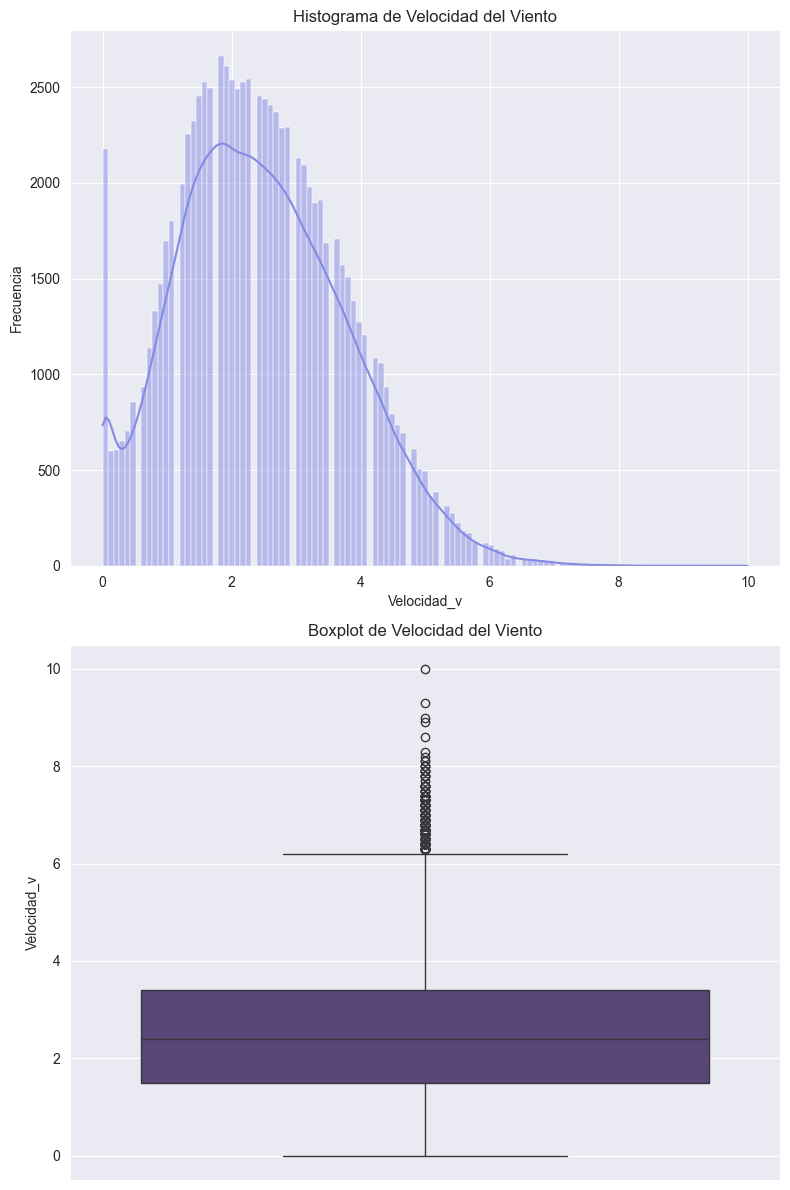

In [17]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 1, figsize=(8, 12))

sns.histplot(Data['Velocidad_v'], kde=True, color='#858ae3', ax=axs[0])
axs[0].set_title('Histograma de Velocidad del Viento')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(y=Data['Velocidad_v'], color='#573d7f', ax=axs[1])
axs[1].set_title('Boxplot de Velocidad del Viento')

plt.tight_layout()
plt.show()

 ### **Velocidad del viento:**
La **Velocidad del viento** revela una distribución presenta una inclinación positiva (sesgo positivo), indica que la mayoría de las mediciones se encuentran en un rango bajo o moderado, aunque hay algunos valores más altos que elevan la media. En el análisis de **datos atípicos** se concluye que existen datos superiores que exceden significativamente el rango, en cuanto a la **dispersión** indica que la mayoría de los datos se concentran en la parte baja del rango, con unos pocos valores extremos que amplían la variabilidad general.

# Analisís bivariado

Se procederá a realizar gráficos de dispersión entre todas las variables numéricas (10 en total) y la variable objetivo, Velocidad_v. El objetivo de estos gráficos es identificar visualmente si existe algún patrón de correlación entre las variables independientes y la velocidad del viento. Esto será útil para comprender mejor qué variables tienen mayor impacto en la velocidad y, eventualmente, para mejorar la precisión del modelo predictivo.

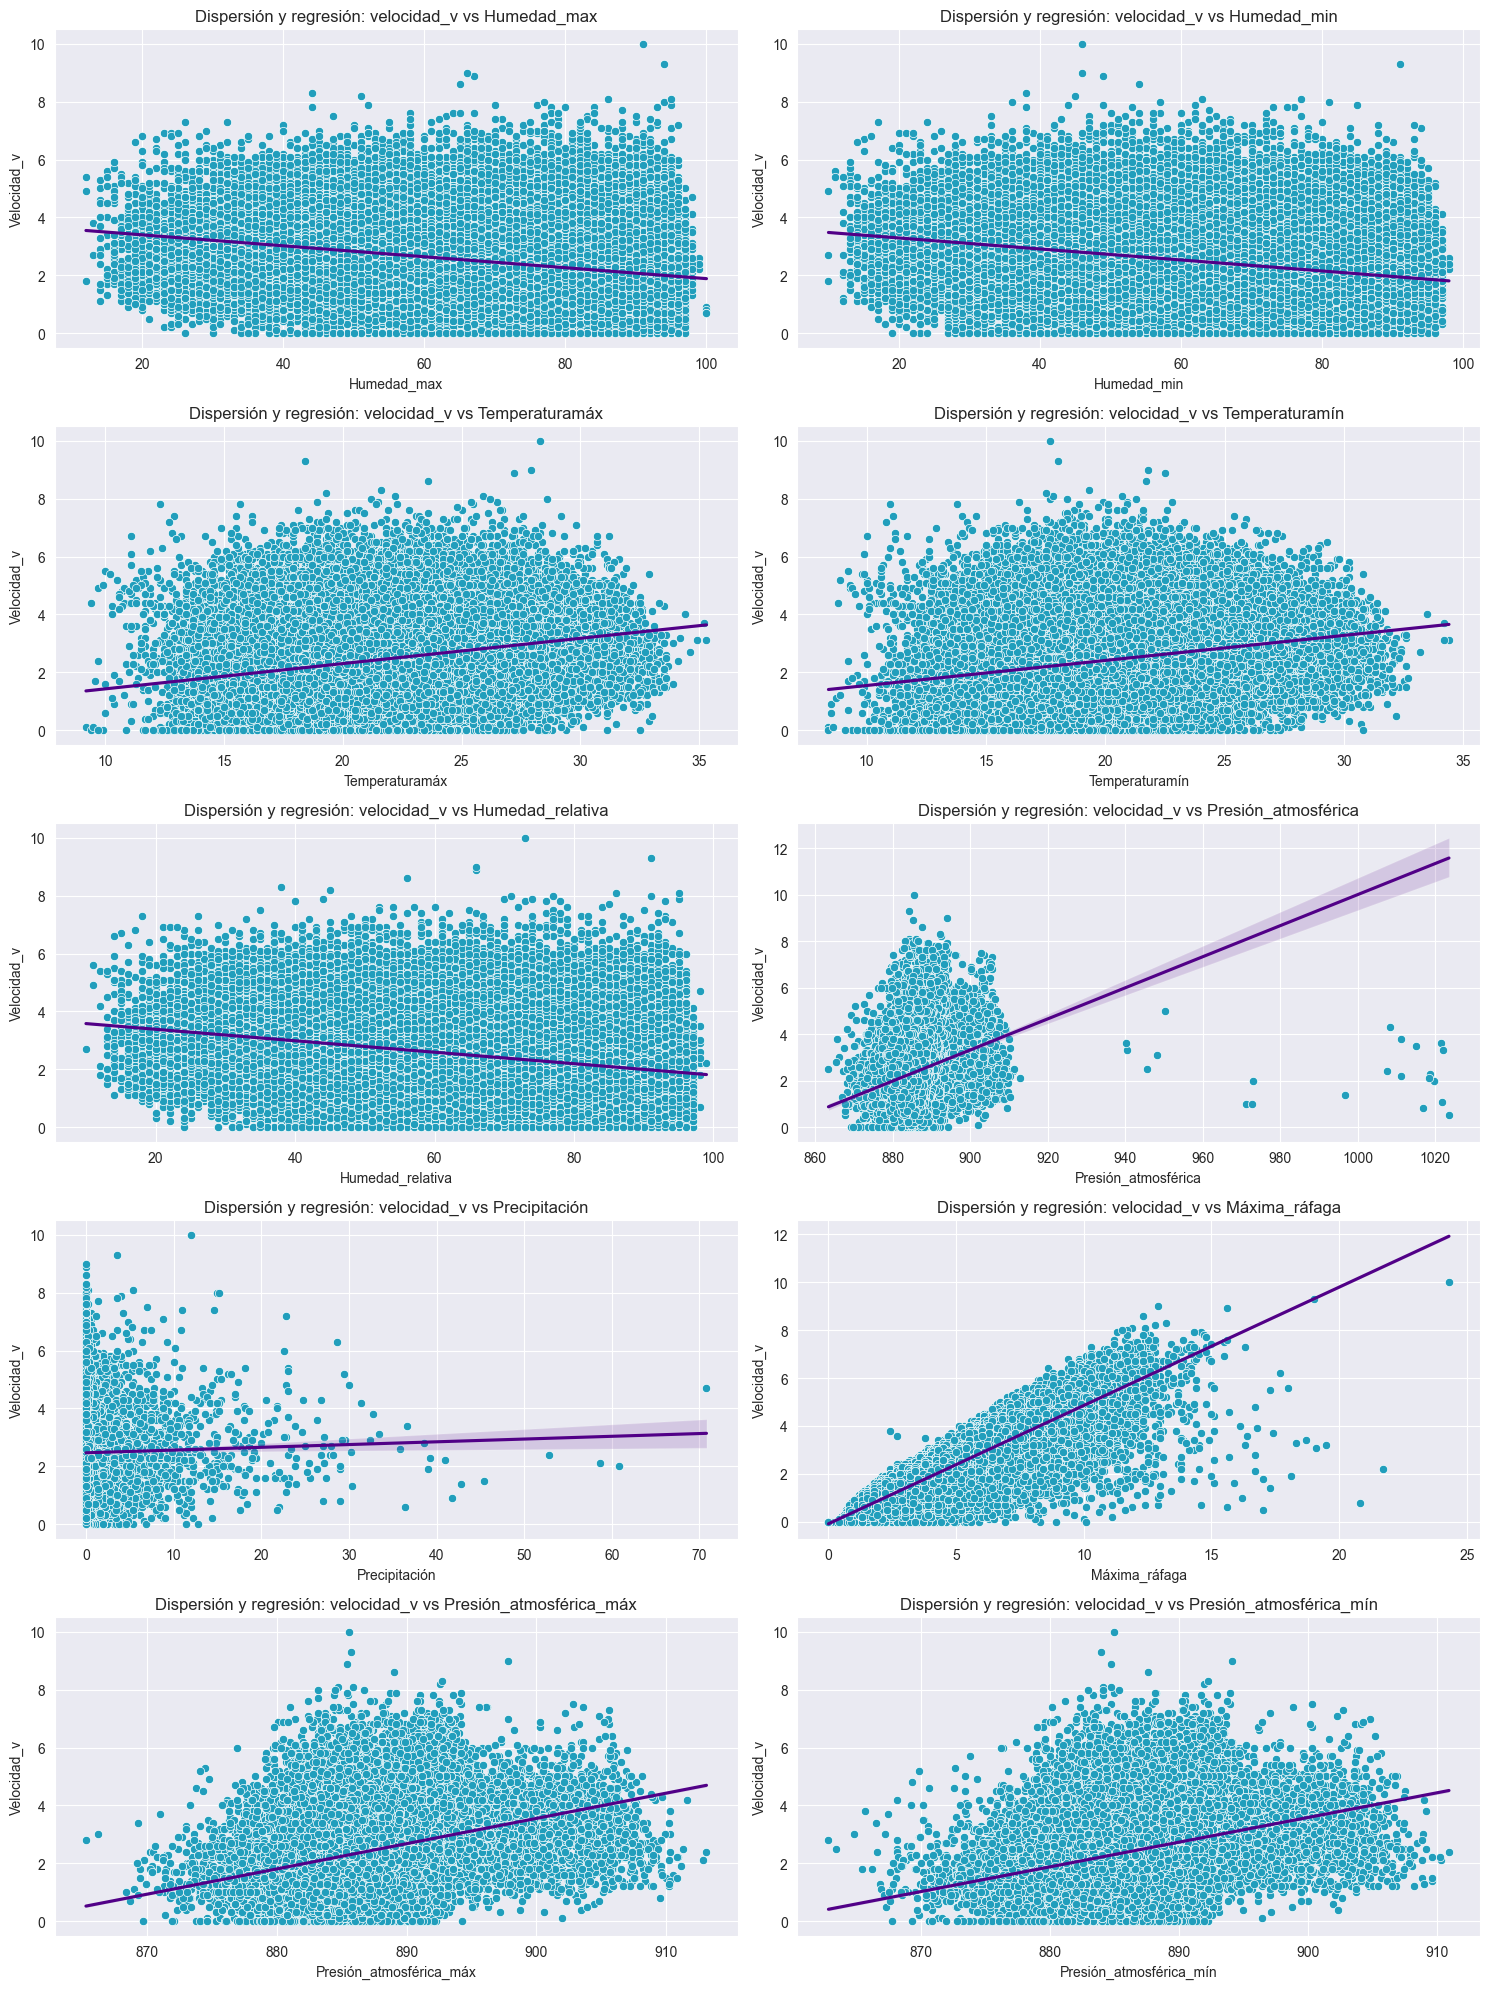

In [52]:
variables = ['Humedad_max', 'Humedad_min', 'Temperaturamáx', 'Temperaturamín', 'Humedad_relativa',
             'Presión_atmosférica', 'Precipitación', 'Máxima_ráfaga', 'Presión_atmosférica_máx', 'Presión_atmosférica_mín']

fig, axes = plt.subplots(5,2, figsize=(15, 20))

for idx, var in enumerate(variables):
    row, col = divmod(idx, 2)
    sns.scatterplot(x=Data[var], y=Data['Velocidad_v'], ax=axes[row, col], color='#219ebc')
    sns.regplot(x=Data[var], y=Data['Velocidad_v'], ax=axes[row, col], scatter=False, color='#510087')
    
    # Descripción
    axes[row, col].set_title(f'Dispersión y regresión: velocidad_v vs {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Velocidad_v')

plt.tight_layout()
plt.show()


El análisis bivariado de la **Velocidad_v** con las demás variables climáticas, revela especialmente que con **Máxima_ráfaga** encontramos una fuerte correlación positiva. Esto sugiere que a medida que aumenta la velocidad del viento, también lo hace la intensidad de las ráfagas. Además, destacan las correlaciones negativas moderadas a leves entre **Velocidad_v** y las variables de humedad: **Humedad_max**, **Humedad_min**, y **Humedad_relativa**; estos resultados sugieren que un aumento en la velocidad del viento puede estar un poco asociado a una disminución en los niveles de humedad, pero no pueden considerarse muy significativas.

En contraste, variables como **Precipitación** y **Presión_atmosférica** presentan correlaciones débiles o nulas con **Velocidad_v**, lo que indica que no hay una relación significativa entre la velocidad del viento y estas variables en particular. En general, los hallazgos restantes muestran correlaciones muy débiles y no son lo suficientemente fuertes como para considerarse significativas.

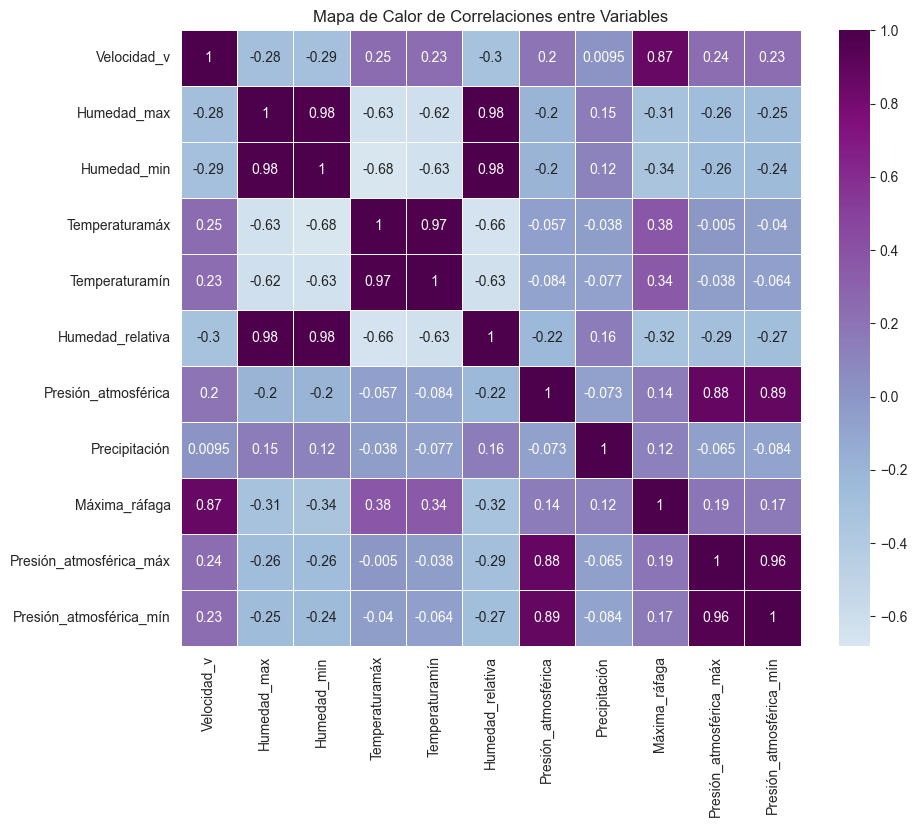

In [54]:
data_numericas = Data[['Velocidad_v', 'Humedad_max', 'Humedad_min', 'Temperaturamáx', 
                       'Temperaturamín', 'Humedad_relativa', 'Presión_atmosférica', 
                       'Precipitación', 'Máxima_ráfaga', 'Presión_atmosférica_máx', 'Presión_atmosférica_mín']]

correlation_matrix = data_numericas.corr()


# Crear un heatmap (mapa de calor) con la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', center=0, linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

Después de analizar los gráficos de dispersión, se procedió a elaborar una matriz de correlación que incluye todas las variables numéricas en el conjunto de datos. Este análisis tiene como objetivo confirmar visualmente las relaciones observadas en los gráficos y explorar posibles correlaciones adicionales entre las variables. La matriz de correlación proporciona una representación cuantitativa de la fuerza y la dirección de las relaciones lineales entre las variables, facilitando así la identificación de patrones que podrían no ser evidentes a simple vista.

En este se identificaron varias relaciones significativas, La **Humedad_max** y **Humedad_min** mostraron una correlación extremadamente alta de (0.977), lo que indica que ambas variables están prácticamente alineadas en sus comportamientos. Asimismo, se observó una correlación fuerte entre **Humedad_relativa** y **Humedad_max** (0.984), así como entre **Humedad_relativa** y **Humedad_min** (0.983), reflejando una fuerte interdependencia entre estas medidas de humedad. Por otro lado, se confirma que la variable **Máxima_ráfaga** mostró una correlación positiva notable de **0.868** con **Velocidad_v**, sugiriendo que el aumento de la velocidad del viento está relacionado con ráfagas más intensas. En el lado negativo, la **Humedad_max** y la **Humedad_min** presentaron correlaciones negativas significativas con **Temperaturamáx** (-0.633) y **Temperaturamín** (-0.682), indicando que a medida que aumentan las temperaturas, los niveles de humedad tienden a disminuir.

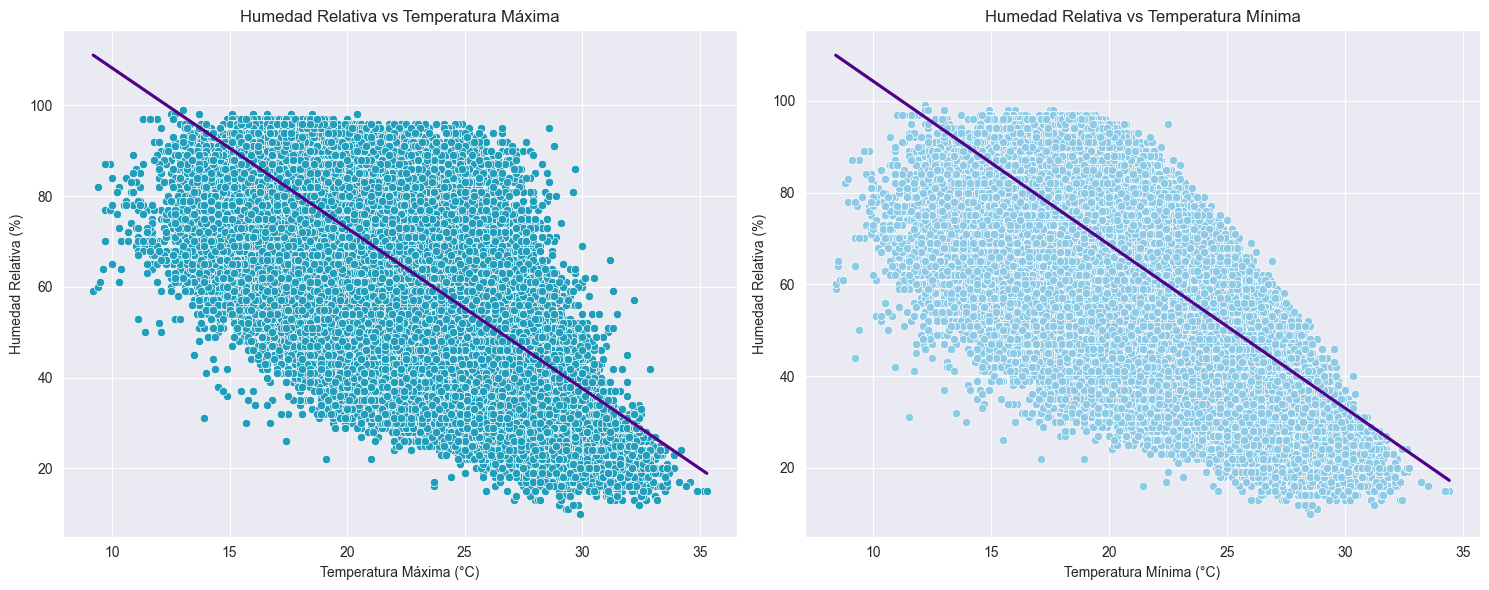

In [59]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=Data['Temperaturamáx'], y=Data['Humedad_relativa'], ax=axes[0], color='#219ebc')
sns.regplot(x=Data['Temperaturamáx'], y=Data['Humedad_relativa'], ax=axes[0], scatter=False, color='#510087')
axes[0].set_title('Humedad Relativa vs Temperatura Máxima')
axes[0].set_xlabel('Temperatura Máxima (°C)')
axes[0].set_ylabel('Humedad Relativa (%)')

sns.scatterplot(x=Data['Temperaturamín'], y=Data['Humedad_relativa'], ax=axes[1], color='#8ecae6')
sns.regplot(x=Data['Temperaturamín'], y=Data['Humedad_relativa'], ax=axes[1], scatter=False, color='#510087')
axes[1].set_title('Humedad Relativa vs Temperatura Mínima')
axes[1].set_xlabel('Temperatura Mínima (°C)')
axes[1].set_ylabel('Humedad Relativa (%)')

plt.tight_layout()
plt.show()

Entre las variables de temperatura y **Humedad_relativa**, se destacan patrones significativos. La correlación entre **Temperaturamáx**, **Temperaturamín** y **Humedad_relativa** muestra una relación inversa fuerte: a medida que aumenta la temperatura, la humedad relativa tiende a disminuir. Esto es consistente con el comportamiento atmosférico esperado, donde un incremento en la temperatura permite que el aire contenga más vapor de agua, resultando en una menor **Humedad_relativa**.